In [61]:
from google.colab import drive # remove the cell if not using colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
base_path = Path('/content/drive/MyDrive/data') # change path here!

# Klasyfikacja pasażerów Titanica
Po wysłaniu raportu pozostało już tylko czekać. Dni mijały, ale w końcu telefon zadzwonił. Okazało się, że po konsultacji Twojego raportu z najbardziej doświadczonymi specjalistami w dziedzinie, zleceniodawca zdecydował się powierzyć Ci dalszą część tajemniczego zadania. Chodzi oczywiście o... **stworzenie modelu przewidującego szanse przeżycia katastrofy Titanica**.

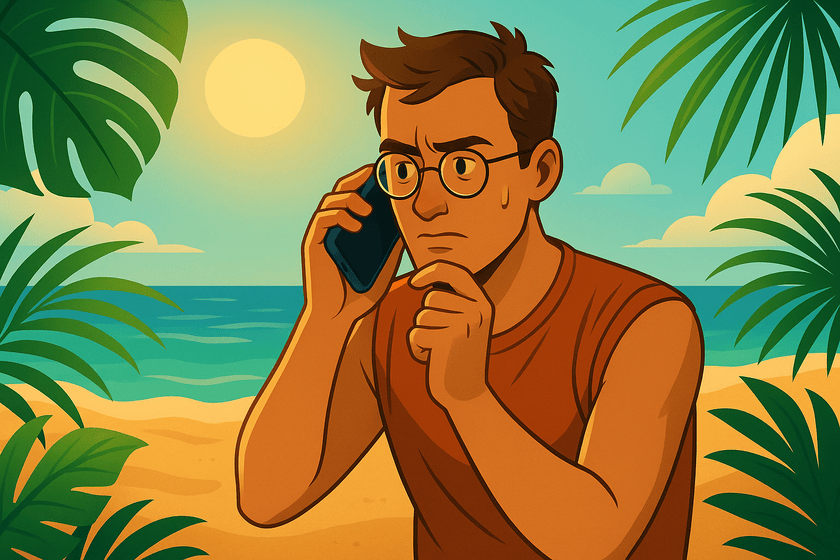

(*AI-generated image*)


#### Twoim celem będzie jest wytrenowanie modeli do klasyfikacji każdego pasażera Titanica jako ofiary (0) lub osoby, która przeżyła (1).

Poniżej znajdziesz pytania, które mogą być pomocne w zadaniu:

- Czego nauczyło Cię o badanym zbiorze danych poprzednie zadanie? Jak możesz wykorzystać wyciągnięte z niego wnioski w procesie tworzenia modelu?
- Jak przeprowadzenie standaryzacji danych może wpływać na zachowanie modelu?
- Co mój model robi i w jaki sposób?
- Jak nie przetrenować wybranego modelu?
- Jaki wynik klasyfikacji możemy uznać za *dobry*?


Wymagania:
- Wypisz obserwacje z pierwszego zadania, które pomogą Ci w tym. Co było przydatne, a co okazało się bezużyteczne?
- [Nie doprowadź](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do ~~przecieku statku~~ wycieku danych (np. nie ucz modelu na danych testowych). Nauczone modele odpal na danych treningowych i testowych - opisz uzyskane wyniki.
- Stwórz baseline, czyli dla porównania sprawdź jak z zadaniem radzi sobie [Dummy Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) (jeśli Twój docelowy model radzi sobie gorzej - uciekaj)
- Przeprowadź badania na dwóch wybranych modelach uczenia maszynowego (np. spośród: drzew decyzyjnych, SVM, MLP, KNN, z gwiazdką [XGBoost](https://xgboost.readthedocs.io/en/stable))
- W badaniach użyj wybranych metryk. Wybór uzasadnij.
- Dla każdego modelu wybierz co najmniej dwa hiperparametry i przeprowadź badania zależności wyników metryk od wartości hiperparametrów. Zwizualizuj wszystko ładnie, zastanów się dlaczego tak mogło być i wyciągnij i wypisz wnioski.
- Podsumuj przeprowadzone badania, wypisz wnioski.

Niezmiennie, zadbaj o czytelność kodu i nazewnictwo zmiennych. Jeśli jakiś wycinek kodu się powtarza, to wyodrębnij go do funkcji. Postaraj się zamieszczać swoje wnioski w postaci komentarza `Markdown`.

Jeśli chcesz, możesz sprawdzić (przyjmując pewne założenia), jakie byłyby Twoje szanse na Titanicu.

Uwaga! Jeśli Titanic to dla Ciebie nic i baaaaardzo chcesz to możesz w ramach tego zadania zająć się [bardziej wymagającym](https://archive.ics.uci.edu/dataset/365/polish+companies+bankruptcy+data) zbiorem.



# ***Polecam rozwinąć spis treści bo mega ułatwi czytanko :)***

In [63]:
titanic_df = pd.read_csv(base_path / 'titanic.csv', index_col='PassengerId')

# **ROZWIĄZANIE ZADANIA 1 EDA:**



In [64]:
titanic_df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
# Sprawdzam typy danych w tabeli

titanic_df.info()
#titanic_df.dtypes

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      793 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [66]:
titanic_df.describe(include = "all")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,793.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,33.123938,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,51.578312,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.925000,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.500000,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


## **1 punkt - Oczyszczenie tabeli:**



In [67]:
titanic_df.isna().sum() # Sprawdzam gdzie są braki

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,98
Cabin,687


### Łatwo zauważyć że:
- Kolumna **Cabin** jest pełna braków i informacje z niej ciężko byłoby zastąpić/zgadnąć, więc zostanie usunięta za momencik 💣
- Zbędna w celu określania szans na przetrwanie będzie też kolumna **Name**. Tak samo **Ticket** , numer biletu nic nam nie powie
- W kolumnie **Age** braki uśrednie biorąc pod uwagę płeć
- W kolumnie **Fare** braki będą uśrednioną wartością, ponieważ wydane pieniądze na bilet nie mają takiego wpływu na przeżycie danego ludka
- Za to braki w kolumnie **Embarked** zostaną uzupełnione po prostu *Unknown*



In [68]:
titanic_df.drop(columns=['Cabin'], inplace = True) # Usunięcie Cabin
titanic_df.drop(columns=['Name'], inplace = True) # Usunięcie Name
titanic_df.drop(columns=['Ticket'], inplace = True) # Usunięcie Ticket

In [69]:
# Kolumna Age

mean_age = np.floor(titanic_df.groupby('Sex')['Age'].mean())               # średnia dla mężczyzn i kobiet
mask_female = (titanic_df['Sex'] == 'female') & (titanic_df['Age'].isna()) # maska dla kobiet
mask_male = (titanic_df['Sex'] == 'male') & (titanic_df['Age'].isna())     # maska dla mężczyzn

titanic_df.loc[mask_female, 'Age'] = mean_age['female']
titanic_df.loc[mask_male, 'Age'] = mean_age['male']

In [70]:
# Kolumna Fare

titanic_df['Fare'].fillna(titanic_df['Fare'].mean(), inplace = True) # Użycia fillna do uzupełniania braków

/tmp/ipython-input-3743736266.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Fare'].fillna(titanic_df['Fare'].mean(), inplace = True) # Użycia fillna do uzupełniania braków


In [71]:
# Kolumna Embarked

titanic_df['Embarked'].fillna('Unknown' , inplace = True)

/tmp/ipython-input-3381570074.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Embarked'].fillna('Unknown' , inplace = True)


In [72]:
# Sprawdzenie czy są jeszcze jakieś braki

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


## **2 punkt - Dodatkowe kolumny:**

- Pierwsza dodana kolumna to będzie *GroupByAge* - podział na dzieci:[0-17], dorosłych:[18:59] i senior:>60
- Drugą kolumną będzie *SizeOfFamily* czyli **SibSp+Porch+1**, suma wszystkich członków rodziny


In [73]:
# Funkcja do kategoryzowania wieku
def categorize_age(age):
    if age <= 17:
        return 'Child'
    elif 18 <= age <= 59:
        return 'Adult'
    else:
        return 'Senior'

In [74]:
# GroupByAge
titanic_df['GroupByAge'] = titanic_df['Age'].apply(categorize_age)

# SizeOfFamily
titanic_df['SizeOfFamily'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df.drop(columns=['SibSp', 'Parch'], inplace = True) # Usunięcie SibSp i Parch

In [75]:
# Sprawdzenie czy działa

titanic_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,GroupByAge,SizeOfFamily
PassengerId,,,,,,,,
1,0,3,male,22.0,7.250000,S,Adult,2
2,1,1,female,38.0,71.283300,C,Adult,2
3,1,3,female,26.0,7.925000,S,Adult,1
4,1,1,female,35.0,53.100000,S,Adult,2
5,0,3,male,35.0,8.050000,S,Adult,1
6,0,3,male,30.0,8.458300,Q,Adult,1
7,0,1,male,54.0,51.862500,S,Adult,1
8,0,3,male,2.0,21.075000,S,Child,5
9,1,3,female,27.0,33.123938,S,Adult,3


## **3 punkt - Kodowanie cech kategorialnych:**

- Dane kategorialne do zakodowania to *Sex, Embarked, GroupByAge*


In [76]:
# Kodowanie Sex (Label encoding):
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})

In [77]:
# Kodowanie Embarked (Frequency encoding):

embarked_frequency = np.round(titanic_df['Embarked'].value_counts(normalize=True), 3)
embarked_frequency.to_dict()
titanic_df['Embarked frequency'] = titanic_df['Embarked'].map(embarked_frequency)


In [78]:
# Kodowanie GroupByAge (Label encoding)

titanic_df['GroupByAge'] = titanic_df['GroupByAge'].map({'Child': 0, 'Adult': 1, 'Senior': 2})

## **4 punkt - Outliers:**

- Zbadam *Age* i *Fare*, ponieważ odchylenie standardowe było tam największe


In [79]:
# Age outliers:

Q1 = titanic_df['Age'].quantile(0.25)
Q3 = titanic_df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_age = titanic_df[(titanic_df['Age'] < lower_bound) | (titanic_df['Age'] > upper_bound)]
outliers_age

,Survived,Pclass,Sex,Age,Fare,Embarked,GroupByAge,SizeOfFamily,Embarked frequency
PassengerId,,,,,,,,,
8,0,3,0,2.00,21.0750,S,0,5,0.723
12,1,1,1,58.00,26.5500,S,1,1,0.723
16,1,2,1,55.00,16.0000,S,1,1,0.723
17,0,3,0,2.00,29.1250,Q,0,6,0.086
34,0,2,0,66.00,10.5000,S,2,1,0.723
...,...,...,...,...,...,...,...,...,...
828,1,2,0,1.00,37.0042,C,0,3,0.189
830,1,1,1,62.00,80.0000,Unknown,2,1,0.002
832,1,2,0,0.83,18.7500,S,0,3,0.723


In [80]:
# Fare outliers:

Q1 = titanic_df['Fare'].quantile(0.25)
Q3 = titanic_df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_Fare = titanic_df[(titanic_df['Fare'] < lower_bound) | (titanic_df['Fare'] > upper_bound)]
outliers_Fare

,Survived,Pclass,Sex,Age,Fare,Embarked,GroupByAge,SizeOfFamily,Embarked frequency
PassengerId,,,,,,,,,
2,1,1,1,38.0,71.2833,C,1,2,0.189
28,0,1,0,19.0,263.0000,S,1,6,0.723
32,1,1,1,27.0,146.5208,C,1,2,0.189
53,1,1,1,49.0,76.7292,C,1,2,0.189
62,1,1,1,38.0,80.0000,Unknown,1,1,0.002
...,...,...,...,...,...,...,...,...,...
830,1,1,1,62.0,80.0000,Unknown,2,1,0.002
836,1,1,1,39.0,83.1583,C,1,3,0.189
850,1,1,1,27.0,89.1042,C,1,2,0.189


## **5 punkt - Wizualizacja cech:**





In [81]:
titanic_df.head(3)

,Survived,Pclass,Sex,Age,Fare,Embarked,GroupByAge,SizeOfFamily,Embarked frequency
PassengerId,,,,,,,,,
1,0,3,0,22.0,7.2500,S,1,2,0.723
2,1,1,1,38.0,71.2833,C,1,2,0.189
3,1,3,1,26.0,7.9250,S,1,1,0.723


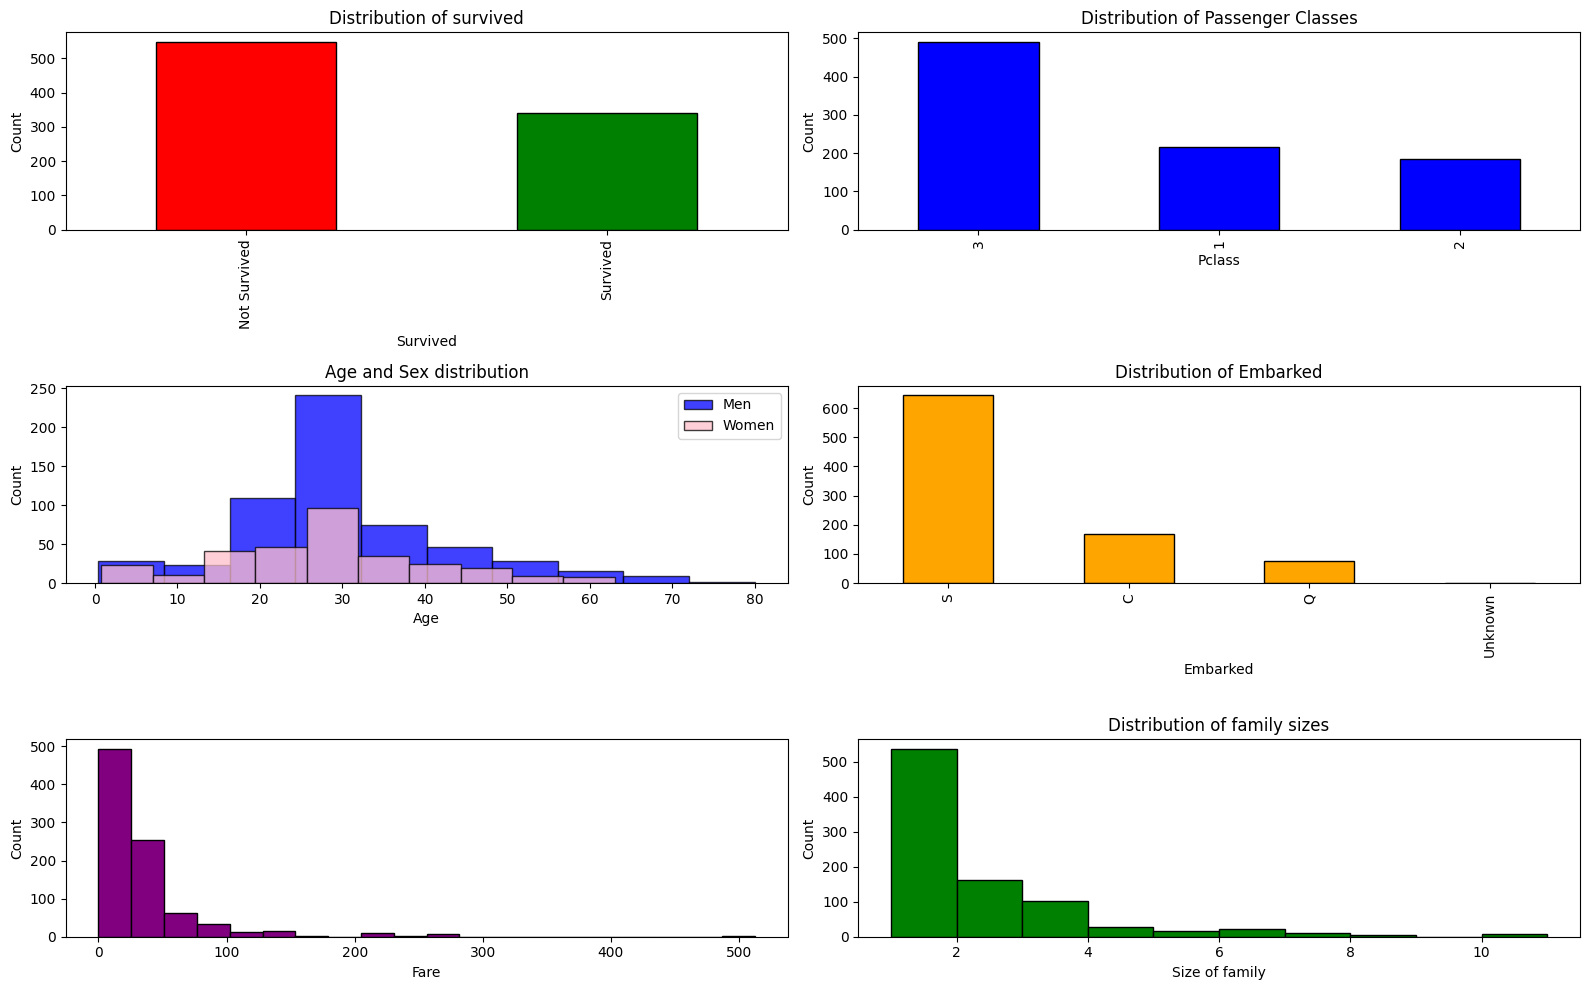

In [82]:
# Wykresy

plt.figure(figsize=(16, 10))

# Wykres przetrwań (wykres słupkowy)
survived_counts = titanic_df['Survived'].value_counts()
plt.subplot(3, 2, 1)
survived_counts.plot(kind='bar', color=['red', 'green'], edgecolor='black')
plt.xticks(range(2), ['Not Survived', 'Survived'])
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Distribution of survived')

# Klasy biletów (wykres słupkowy)

pclass_counts = titanic_df['Pclass'].value_counts()
plt.subplot(3, 2, 2)
pclass_counts.plot(kind='bar', color=['blue'], edgecolor='black')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Distribution of Passenger Classes')

# Sex i Age (histogram)

male_ages = titanic_df[titanic_df['Sex'] == 0]['Age']
female_ages = titanic_df[titanic_df['Sex'] == 1]['Age']
plt.subplot(3, 2, 3)
plt.hist(male_ages, bins=10, alpha=0.75, label='Men', color='blue', edgecolor = 'black')
plt.hist(female_ages, bins=10, alpha=0.75, label='Women', color='pink', edgecolor = 'black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age and Sex distribution')
plt.legend()

# Embarked (słupkowy)

embarked_counts = titanic_df['Embarked'].value_counts()
plt.subplot(3, 2, 4)
embarked_counts.plot(kind='bar', color=['orange'], edgecolor='black')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Distribution of Embarked')

# Fare (histogram)

fares = titanic_df['Fare']
plt.subplot(3, 2, 5)
plt.hist(fares, bins=20, color='purple', edgecolor = 'black')
plt.xlabel('Fare')
plt.ylabel('Count')

# Rozmiar rodziny (histogram)

families_size = titanic_df['SizeOfFamily']
plt.subplot(3, 2, 6)
plt.hist(families_size, bins=10, color='green', edgecolor = 'black')
plt.xlabel('Size of family')
plt.ylabel('Count')
plt.title('Distribution of family sizes')

plt.tight_layout()
plt.show()

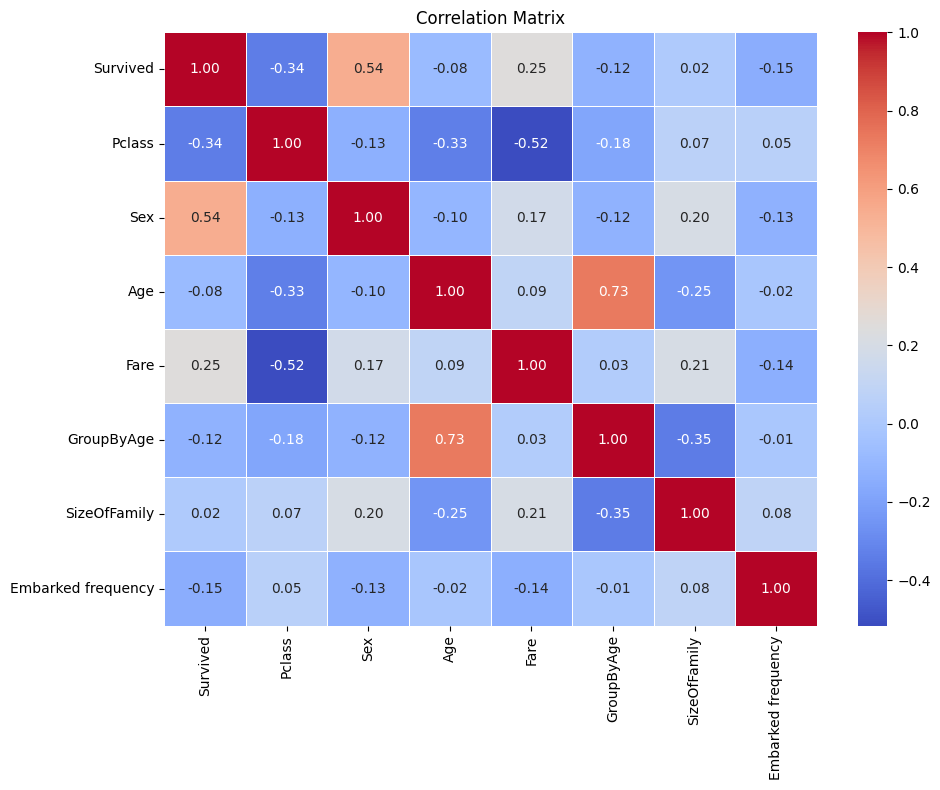

In [83]:
# Heatmapa

def plot_correlation_matrix(df):
    """
    Plots a heatmap showing the correlation matrix for numeric columns in the DataFrame.
    Parameters:
        df (pandas.DataFrame): The DataFrame containing numeric data.
    Returns:
        None. Displays the correlation heatmap.
    """
    # compute correlation matrix only for numeric columns
    corr = df.corr(numeric_only=True)

    # fmt=".2f" rounds the number to 0.01
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

plot_correlation_matrix(titanic_df)

# **ROZWIĄZANIE ZADANIA 2 ML:**

In [84]:
titanic_df.head(5)
titanic_df.drop(columns = ['Embarked'], inplace = True) # Usuwam zeby model mógł działać

## **Podział danych:**

In [93]:
from sklearn.model_selection import train_test_split

X = titanic_df.drop(columns=['Survived'], axis=1)
y = titanic_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Baseline, DummyClassifier:**
Wynik baseline'u to będzie nasz punkt odniesienia. Co do "strategy" naszego baseline'a to zdecydowałem się na uniform, ponieważ przewiduje losowo, z równym prawdopodobieństwem.

In [97]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
dummy = DummyClassifier(strategy="uniform")
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)

print("Dummy Accuracy:", accuracy_score(y_test, y_pred_dummy))
print("Classification Report:")
print(classification_report(y_test, y_pred_dummy))

Dummy Accuracy: 0.4972067039106145
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.53      0.55       105
           1       0.40      0.45      0.42        74

    accuracy                           0.50       179
   macro avg       0.49      0.49      0.49       179
weighted avg       0.51      0.50      0.50       179



teraz należy modlić się o większe accuracy w naszym modelu 🙏

## **Modele:**


### 1 model: Drzewo decyzyjne:

In [94]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(random_state=42, max_depth = 5, criterion='gini')
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print(f"Tree Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_tree))

Tree Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



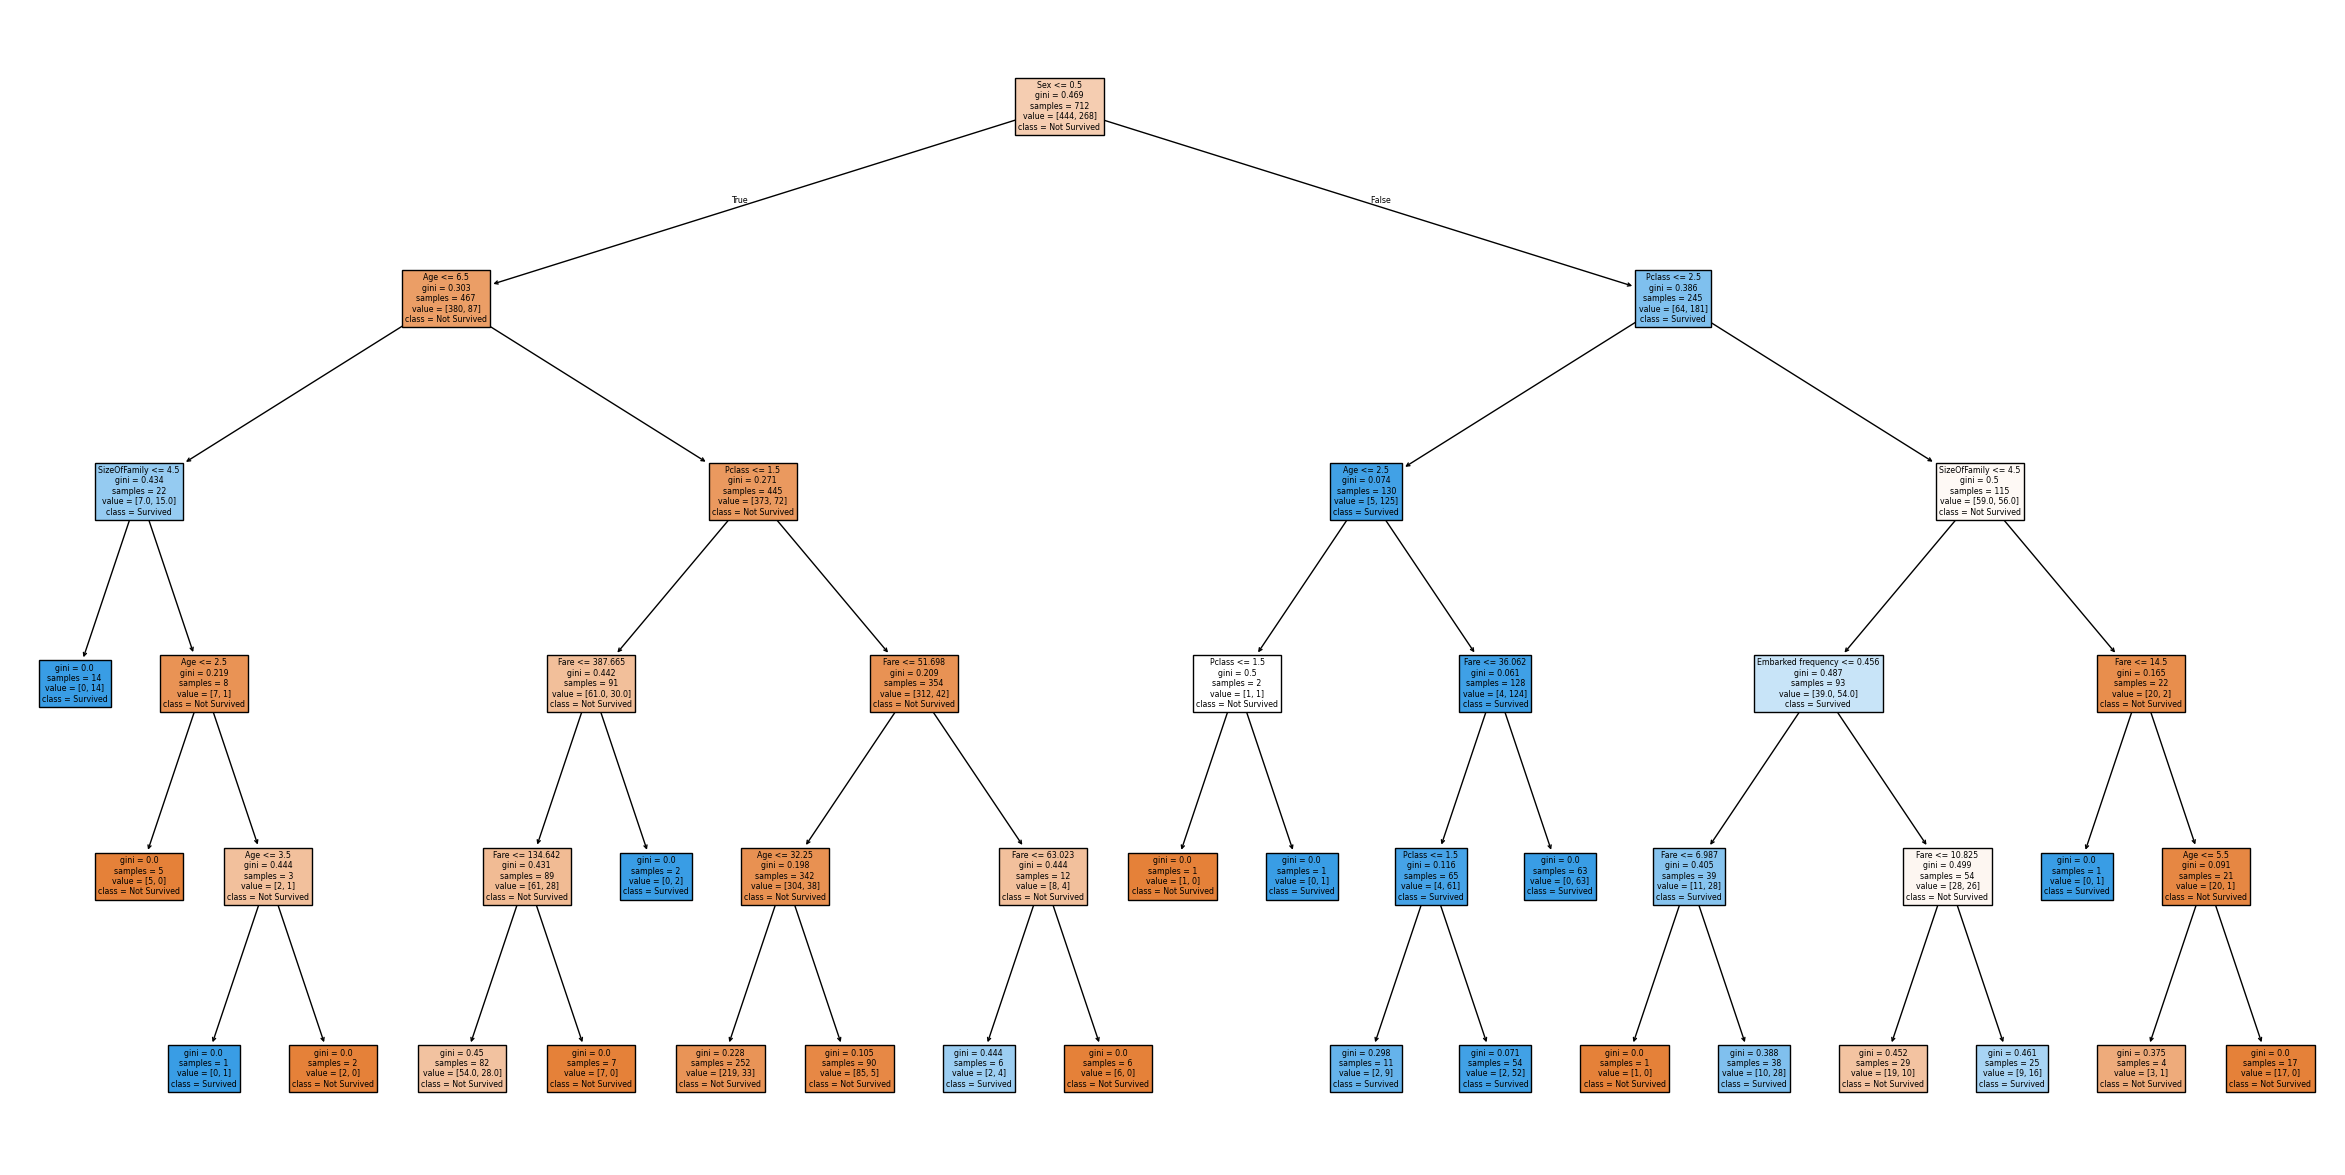

In [95]:
# Wizualizacja drzewka

plt.figure(figsize=(30, 15))
plot_tree(tree, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

Jest akceptowalnie bo uzyskaliśmy lepsze wyniki niz dla baseline 🐋

### 2 model: Metoda najbliższych sąsiadów KNN


In [96]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric='cosine')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       105
           1       0.78      0.58      0.67        74

    accuracy                           0.76       179
   macro avg       0.77      0.73      0.74       179
weighted avg       0.76      0.76      0.75       179



**Można zauważyć że:**

- KNN radzi sobie dużo lepiej niż losowy baseline (uniform), ale gorzej niż drzewo decyzyjne.
- F1 = 0.6667 oznacza, że KNN ma gorszą równowagę między precision i recall niż drzewo (0.75).
- Accuracy KNN jest też niższe (0.76 vs 0.81).

Podsumowując KNN radzi sobie dużo lepiej niż losowy baseline, ale gorzej niż drzewo decyzyjne.

## **Hiperparametry:**

Używam accuracy i F1, ponieważ accuracy jako sama dokładność wydaję się być coolerską i cenną informacją, za to F1 to trochę kompromis między recall i precision, i jest to ich średnia harmoniczna więc uznałem że będzie chyba sensowna miara naszego "sukcesu"

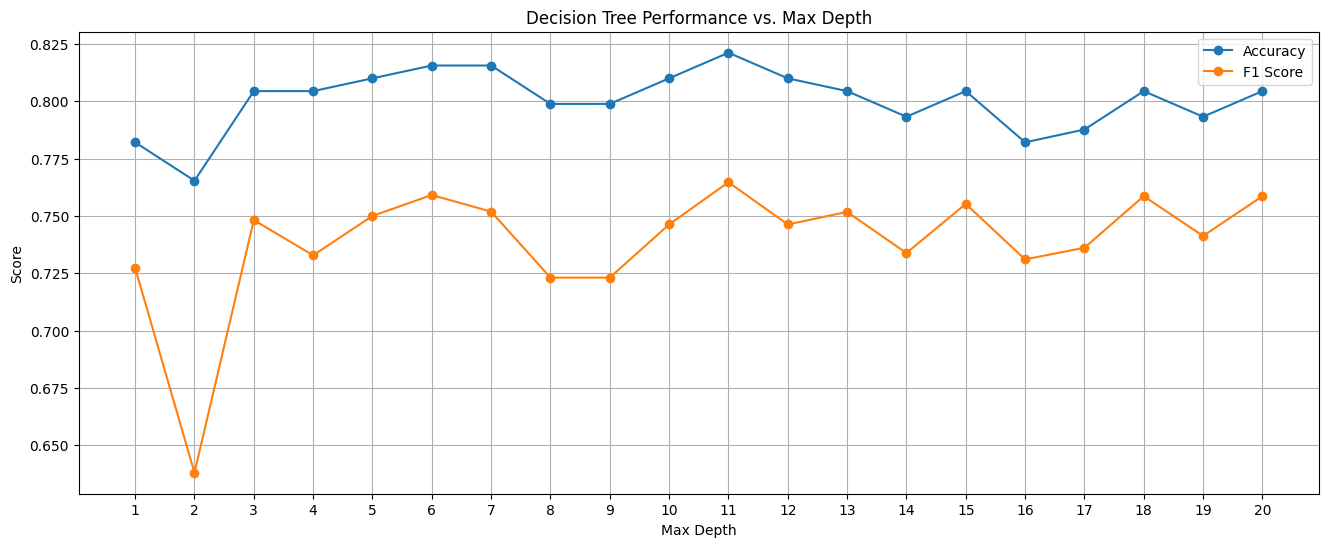

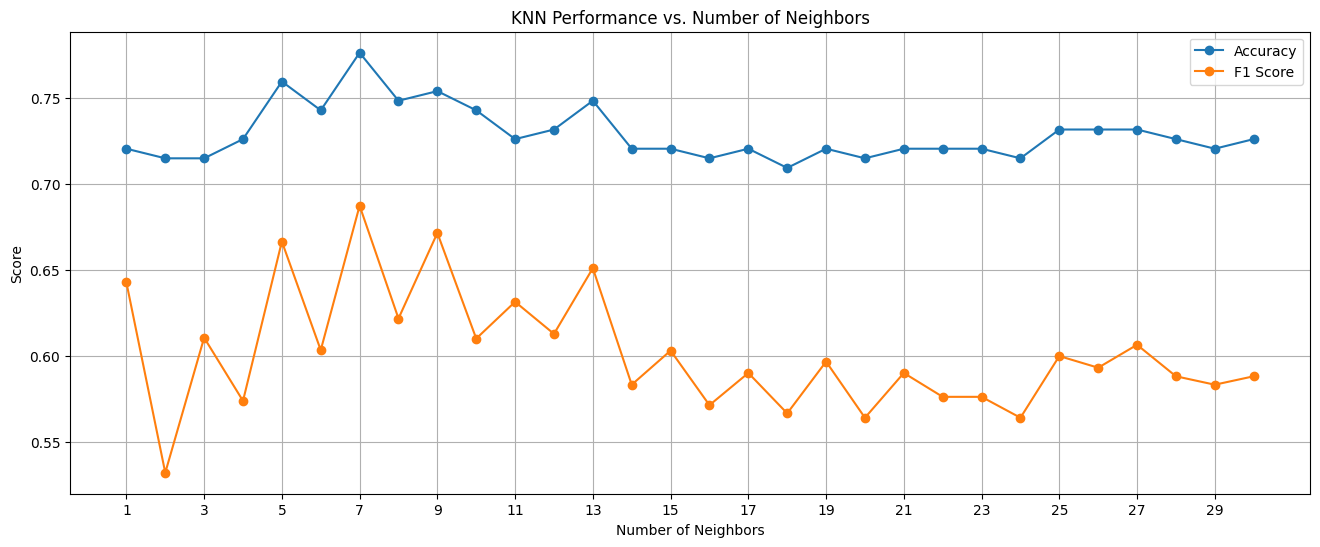

In [100]:
max_depths = range(1, 21)
tree_accuracy = []
tree_f1 = []


# Dla drzewka
for depth in max_depths:
    tree = DecisionTreeClassifier(random_state=42, max_depth=depth, criterion='gini')
    tree.fit(X_train, y_train)
    y_pred_tree = tree.predict(X_test)
    tree_accuracy.append(accuracy_score(y_test, y_pred_tree))
    tree_f1.append(f1_score(y_test, y_pred_tree))

plt.figure(figsize=(16, 6))
plt.plot(max_depths, tree_accuracy, marker='o', label='Accuracy')
plt.plot(max_depths, tree_f1, marker='o', label='F1 Score')
plt.title('Decision Tree Performance vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.xticks(max_depths)
plt.legend()
plt.grid(True)
plt.show()


# Dla sąsiadów
n_neighbors_values = range(1, 31)
knn_accuracy = []
knn_f1 = []

for n in n_neighbors_values:
    knn = KNeighborsClassifier(n_neighbors=n, metric='cosine')
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    knn_accuracy.append(accuracy_score(y_test, y_pred_knn))
    knn_f1.append(f1_score(y_test, y_pred_knn))

plt.figure(figsize=(16, 6))
plt.plot(n_neighbors_values, knn_accuracy, marker='o', label='Accuracy')
plt.plot(n_neighbors_values, knn_f1, marker='o', label='F1 Score')
plt.title('KNN Performance vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.xticks(n_neighbors_values[::2])
plt.legend()
plt.grid(True)
plt.show()

PS. wiem że to nie najlepsza praca i mogłem się bardziej postarać, ale od czwartku do niedzieli miałem gości, więc ciężko było mi znaleźć czas. Na następnym zadanku obiecuje lepszy performance 🙏

Materiał dowodowy: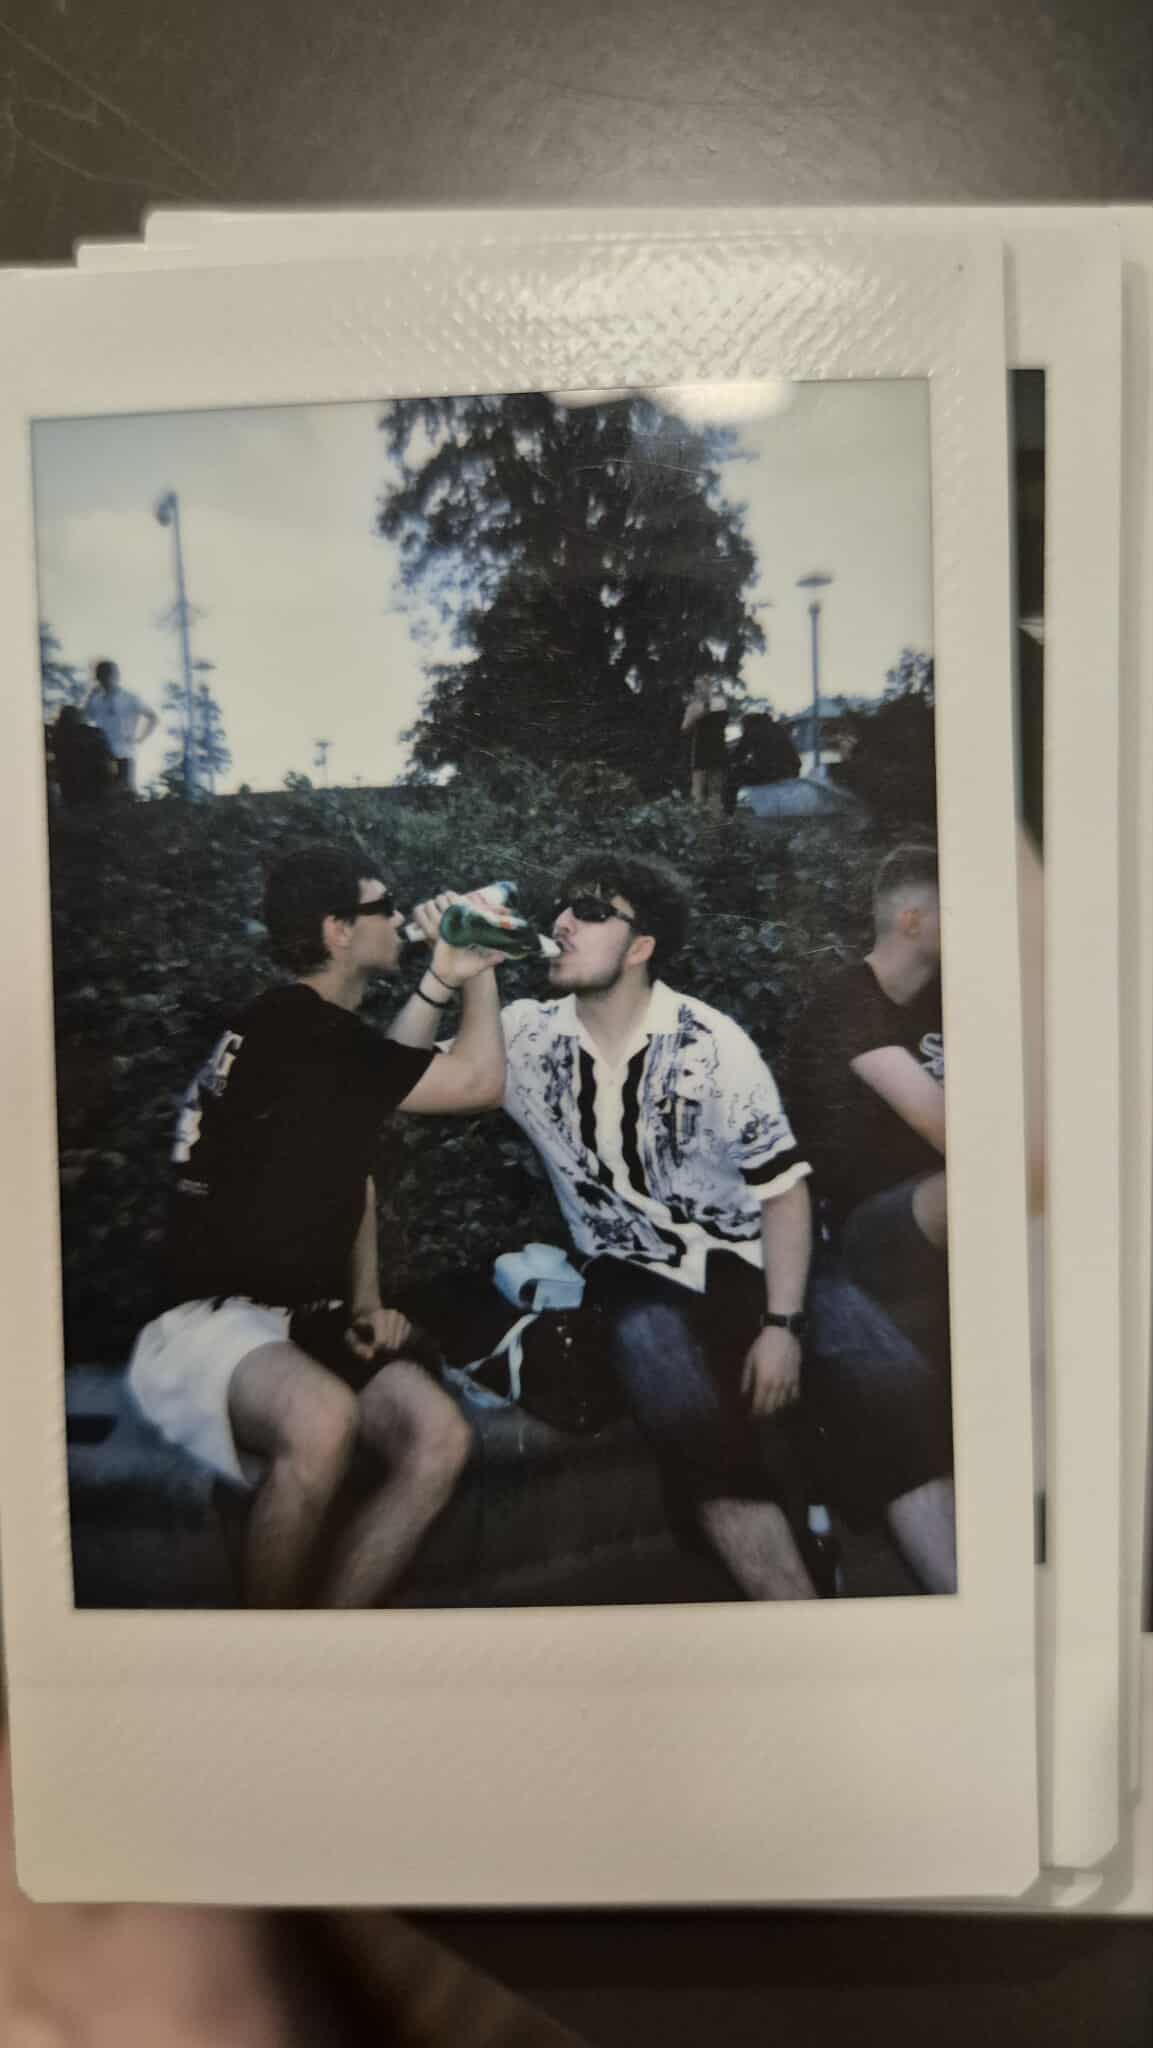